In [1]:
import numpy as np
import prtools as pr
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Exercise 2.5

In [2]:
n = 100

# training set
x_train = np.random.rand(n, 1)
e_train = np.random.randn(n, 1)
y_train = x_train**2 + e_train

# testing set
x_test = np.random.rand(n, 1)
e_test = np.random.randn(n, 1)
y_test = x_test**2 + e_test

# Create datasets
train_data = pr.gendatr(x_train, y_train)
test_data = pr.gendatr(x_test, y_test)

# Define polynomial regression mapping using pr.linearr
degree = 2
model = pr.linearr(train_data, degree)

# Make predictions
y_pred = model(test_data)

# Extract values from prdataset
y_pred_values = y_pred.data[:, 0]

# Calculate Mean Squared Error
mse = np.mean((y_test - y_pred_values)**2)
print(f"Degree {degree} Polynomial - Training size {n} - Mean Squared Error: {mse:.4f}")

Degree 2 Polynomial - Training size 100 - Mean Squared Error: 1.3385


--------------------Training size: 4--------------------
Degree 0 Polynomial - Train Mean Squared Error: 1.0151 - Test Mean Squared Error: 0.8241
Degree 1 Polynomial - Train Mean Squared Error: 0.8480 - Test Mean Squared Error: 2.0034
Degree 2 Polynomial - Train Mean Squared Error: 0.7932 - Test Mean Squared Error: 3.2526
Degree 3 Polynomial - Train Mean Squared Error: 0.0000 - Test Mean Squared Error: 25.5734
--------------------Training size: 40--------------------
Degree 0 Polynomial - Train Mean Squared Error: 0.9131 - Test Mean Squared Error: 1.2240
Degree 1 Polynomial - Train Mean Squared Error: 0.5592 - Test Mean Squared Error: 1.0622
Degree 2 Polynomial - Train Mean Squared Error: 0.5239 - Test Mean Squared Error: 1.0845
Degree 3 Polynomial - Train Mean Squared Error: 0.5197 - Test Mean Squared Error: 1.1262
--------------------Training size: 400--------------------
Degree 0 Polynomial - Train Mean Squared Error: 1.0673 - Test Mean Squared Error: 1.2760
Degree 1 Polynomial - Tr

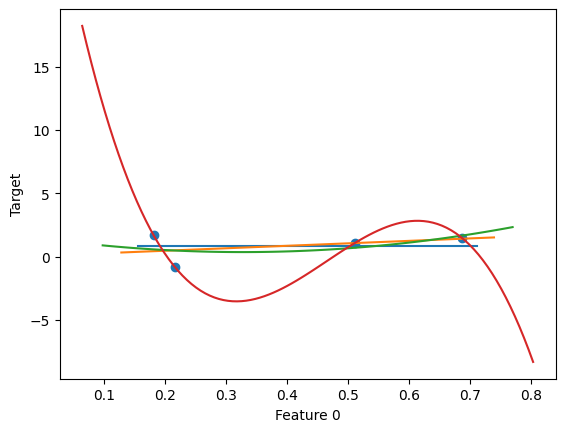

In [3]:
training_n = [4, 40, 400]

for n in training_n:

    print("-"*20 +  f"Training size: {n}" + "-"*20)
    
    # training set
    x_train = np.random.rand(n, 1)
    e_train = np.random.randn(n, 1)
    y_train = x_train**2 + e_train
    
    # testing set
    x_test = np.random.rand(n, 1)
    e_test = np.random.randn(n, 1)
    y_test = x_test**2 + e_test

    # Create datasets
    train_data = pr.gendatr(x_train, y_train)
    test_data = pr.gendatr(x_test, y_test)

    if n == 4: pr.scatterr(train_data)

    # Evaluate degrees from 0 to 3
    for degree in range (4):
        # Define polynomial regression mapping using pr.linearr
        model = pr.linearr(train_data, degree)
        
        if n == 4: pr.plotr(model)

        # Make predictions
        y_test_pred = model(test_data)
        y_train_pred = model(train_data)

        # Extract values from prdataset
        y_test_pred_values = y_test_pred.data[:, 0]
        y_train_pred_values = y_train_pred.data[:, 0]

        # Calculate Mean Squared Error
        test_mse = np.mean((y_test.flatten() - y_test_pred_values)**2)
        train_mse = np.mean((y_train.flatten() - y_train_pred_values)**2)
        
        print(f"Degree {degree} Polynomial - Train Mean Squared Error: {train_mse:.4f} - Test Mean Squared Error: {test_mse:.4f}") 

        

# Exercise 2.6

## a)

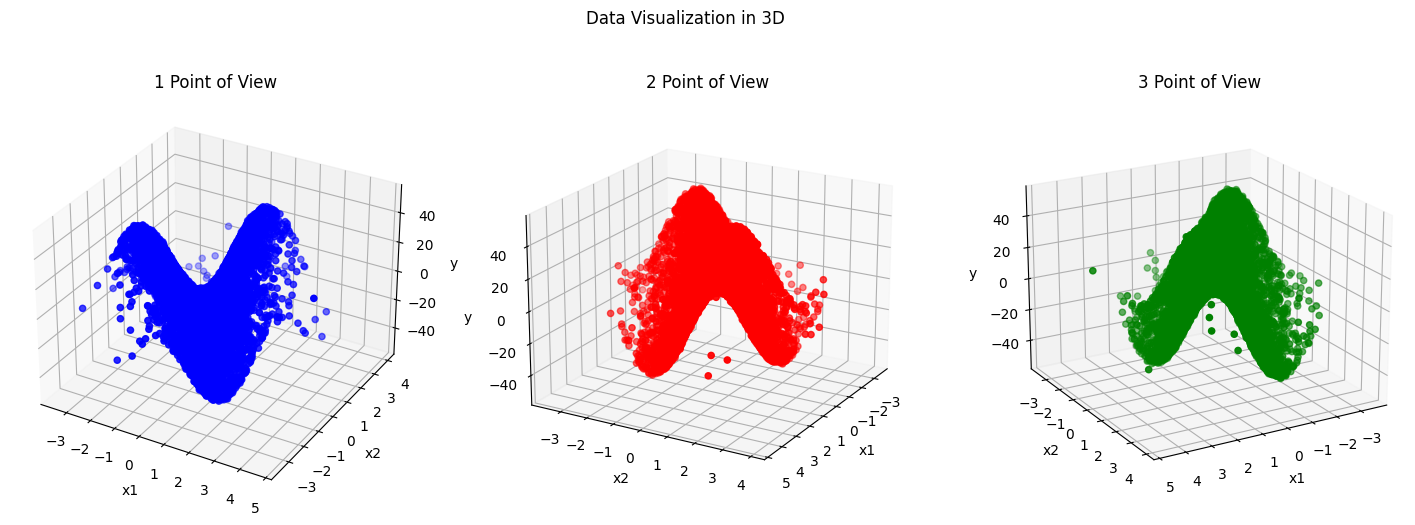

In [4]:
# Number of samples
n_samples = 10000

# Input 2D Std Normal vector
train_x = np.random.randn(n_samples, 2)

# Std Normal error Error
train_e = np.random.randn(n_samples, 1)

# Output
train_y = 50*np.sin(train_x[:,0].reshape(-1, 1))*np.sin(train_x[:,1].reshape(-1, 1)) + train_e

# Prdataset
train_dataset = pr.gendatr(train_x, train_y)

# Visualization
fig = plt.figure(figsize=(18, 6))

# 3 Point of View
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(train_x[:, 0], train_x[:, 1], train_y.flatten(), c='b', marker='o')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('1 Point of View')

# 2 Point of View
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(train_x[:, 0], train_x[:, 1], train_y.flatten(), c='r', marker='o')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.view_init(elev=20, azim=30)  
ax2.set_title('2 Point of View')

# 3 Point of View
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(train_x[:, 0], train_x[:, 1], train_y.flatten(), c='g', marker='o')
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.view_init(elev=20, azim=60)  
ax3.set_title('3 Point of View')

plt.suptitle('Data Visualization in 3D')
plt.show()

## b)

In [5]:
# Test set
test_x = np.random.randn(n_samples, 2)
test_e = np.random.randn(n_samples, 1)
test_y = 50*np.sin(test_x[:,0].reshape(-1, 1))*np.sin(test_x[:,1].reshape(-1, 1)) + test_e
test_dataset = pr.gendatr(test_x, test_y)

def linear_regression_prediction(train_dataset, test_dataset, train_y, test_y, degree):
    # Fit a linear linear regression
    model = pr.linearr(train_dataset, degree)
    
    # Make predictions
    y_test_pred = model(test_dataset)
    y_train_pred = model(train_dataset)
    
    # Extract values
    y_test_pred_values = y_test_pred.data[:, 0]
    y_train_pred_values = y_train_pred.data[:, 0]
    
    # Calculate Mean Squared Error
    test_mse = np.mean((test_y.flatten() - y_test_pred_values)**2)
    train_mse = np.mean((train_y.flatten() - y_train_pred_values)**2) 
    
    print(f"Degree {degree} Polynomial - Train Mean Squared Error: {train_mse:.4f} - Test Mean Squared Error: {test_mse:.4f}")
    
linear_regression_prediction(train_dataset, test_dataset, train_y, test_y, 1)

Degree 1 Polynomial - Train Mean Squared Error: 466.1453 - Test Mean Squared Error: 465.7258


## c)

In [6]:
for i in range(2, 11):
    linear_regression_prediction(train_dataset, test_dataset, train_y, test_y, i)

Degree 2 Polynomial - Train Mean Squared Error: 466.0602 - Test Mean Squared Error: 465.7210
Degree 3 Polynomial - Train Mean Squared Error: 465.9611 - Test Mean Squared Error: 465.7275
Degree 4 Polynomial - Train Mean Squared Error: 465.9236 - Test Mean Squared Error: 465.6282
Degree 5 Polynomial - Train Mean Squared Error: 465.9220 - Test Mean Squared Error: 465.6200
Degree 6 Polynomial - Train Mean Squared Error: 465.8405 - Test Mean Squared Error: 465.5526
Degree 7 Polynomial - Train Mean Squared Error: 465.7419 - Test Mean Squared Error: 465.4573
Degree 8 Polynomial - Train Mean Squared Error: 465.7030 - Test Mean Squared Error: 465.4571
Degree 9 Polynomial - Train Mean Squared Error: 465.6370 - Test Mean Squared Error: 466.6302
Degree 10 Polynomial - Train Mean Squared Error: 465.6248 - Test Mean Squared Error: 466.5979


## d)

The problem is that pr.linearr does not take into account any cross term

## e)

Degree 1 Polynomial - Train Mean Squared Error: 0.0069
Degree 2 Polynomial - Train Mean Squared Error: 0.0069


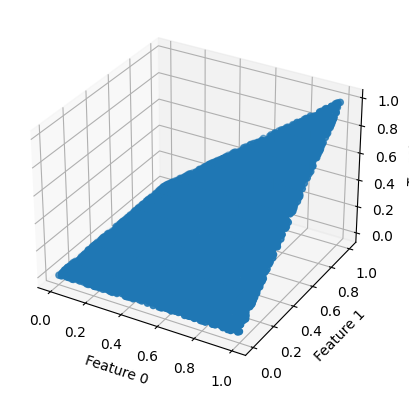

In [7]:
# Input
x = np.random.rand(n_samples, 2)

# Output
y = x[:,0].reshape(-1, 1)*x[:,1].reshape(-1, 1)

# Dataset
dataset = pr.gendatr(x, y)

# Models
w1 = pr.linearr(dataset, 1)
w2 = pr.linearr(dataset, 2)

# Make predictions
p1 = w1(dataset).data[:, 0]
p2 = w2(dataset).data[:, 0]

# Calculate Mean Squared Error
mse1 = np.mean((y.flatten() - p1)**2)
mse2 = np.mean((y.flatten() - p2)**2) 

print(f"Degree 1 Polynomial - Train Mean Squared Error: {mse1:.4f}")
print(f"Degree 2 Polynomial - Train Mean Squared Error: {mse2:.4f}")

# Visualization
pr.scatterr(dataset)

# Exercise 2.14

## a)

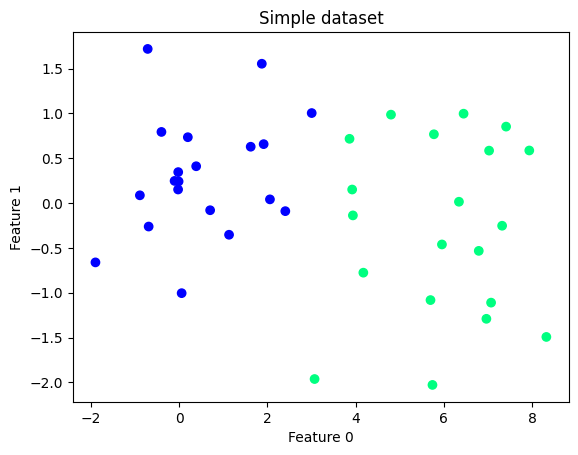

In [60]:
dataset = pr.gendats([20,20],2,6)

pr.scatterd(dataset)

X = dataset.data
labels = dataset.nlab()

#Perceptron algorithm: 
def add_bias(X):
    # Add a column of ones to the input matrix for the bias term
    return np.hstack([np.ones((X.shape[0], 1)), X])

def perceptron_train(X, y, learning_rate=0.1, max_iterations=1000):
    X_with_bias = add_bias(X)
    num_samples, num_features = X_with_bias.shape

    # Initialize weights with zeros
    weights = np.zeros(num_features)

    for _ in range(max_iterations):
        # Iterate through each sample
        for i in range(num_samples):
            # Compute the predicted class (1 or -1)
            y_pred = np.sign(np.dot(X_with_bias[i], weights))

            # Update weights if misclassification occurs
            if y_pred != y[i]:
                update = learning_rate * y[i] * X_with_bias[i]
                weights += update

    return weights

def perceptron_predict(X, weights):
    X_with_bias = add_bias(X)
    # Compute the predicted class (1 or -1)
    return np.sign(np.dot(X_with_bias, weights))

In [61]:
perceptron_train(X, y)

array([-6000.        , -3179.4136188 , -1849.90143328])

# Exercise 2.15

In [86]:
x = +a
y = 2*a.nlab() - 3
[n , dim] = x.shape
x = np.hstack([x, np.ones((x.shape[0], 1))])
w_hat = np.linalg.inv(x.T@x)@x.T@y
